In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('wine_data.csv', header=None, usecols=[0,1,2])
df.columns=['Class label', 'Alcohol', 'Malic acid']

In [4]:
df

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

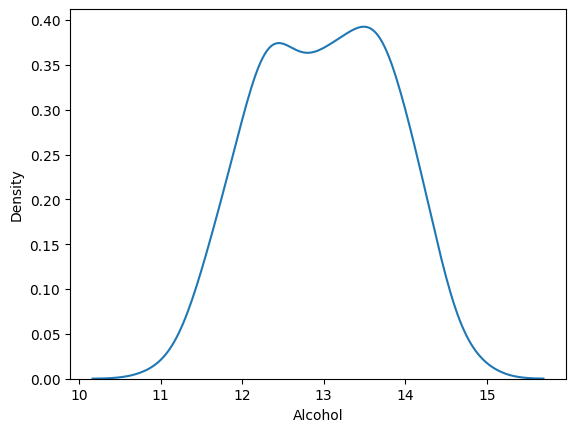

In [5]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic acid', ylabel='Density'>

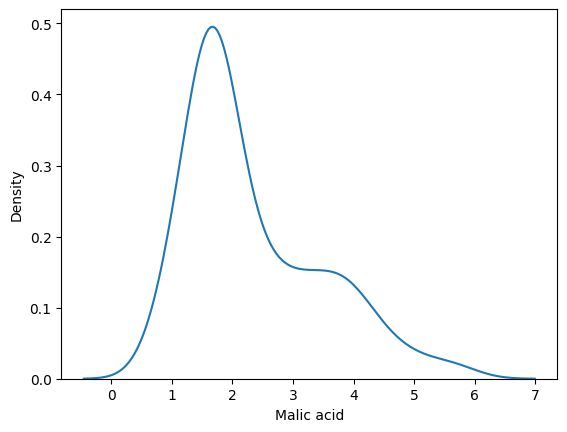

In [6]:
sns.kdeplot(df['Malic acid'])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

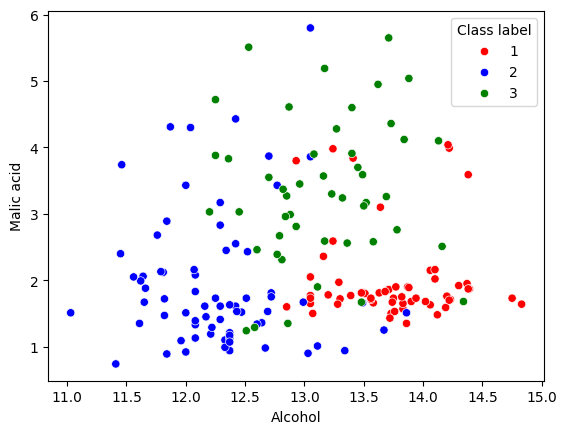

In [11]:
color_dict={1:'red',2:'blue',3:'green'}
sns.scatterplot(x=df['Alcohol'],y=df['Malic acid'],hue=df['Class label'],palette=color_dict )

In [13]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(df.drop('Class label',axis=1), df['Class label'], test_size=0.3, random_state=0)

In [15]:
train_X.shape, test_X.shape

((124, 2), (54, 2))

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(train_X)
train_X_scaled = scaler.transform(train_X)
test_X_scaled = scaler.transform(test_X)

In [19]:
train_X_scaled = pd.DataFrame(train_X_scaled, columns=train_X.columns)
test_X_scaled = pd.DataFrame(test_X_scaled, columns=test_X.columns)

In [22]:
np.round(train_X_scaled.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


<Axes: title={'center': 'After Scaling'}, xlabel='Malic acid', ylabel='Density'>

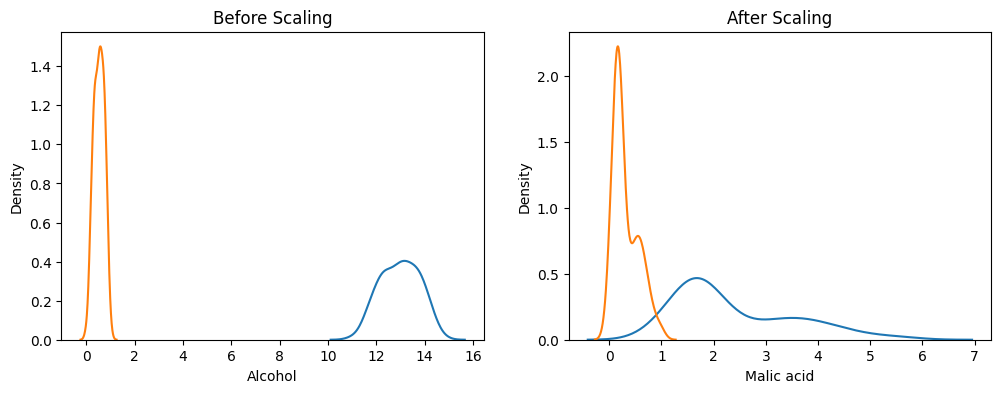

In [27]:
fig , (ax1,ax2)=plt.subplots(ncols=2, figsize=(12,4))

ax1.set_title('Before Scaling')
sns.kdeplot(train_X['Alcohol'],ax=ax1)
sns.kdeplot(train_X['Malic acid'],ax=ax2)

ax2.set_title('After Scaling')
sns.kdeplot(train_X_scaled['Alcohol'],ax=ax1)
sns.kdeplot(train_X_scaled['Malic acid'],ax=ax2)